# Initial eICU db exploration

In [1]:
from creds import creds 
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# grab database creds
host = creds.host
port = creds.port
uname = creds.username
pwd = creds.password


In [4]:
# establish connection
dbname = 'eicu'
conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}"
                           .format(host, port, dbname, uname, pwd))

In [9]:
sql = "select table_name FROM information_schema.tables WHERE table_schema='eicu_crd' AND table_type='BASE TABLE';"
pd.read_sql_query(sql, conn)

,table_name
0,careplangeneral
1,careplangoal
2,careplaninfectiousdisease
3,customlab
4,diagnosis
5,hospital
6,infusiondrug
7,intakeoutput
8,lab
9,admissiondrug


In [11]:
pd.read_sql_query("select column_name, data_type from information_schema.columns where table_schema = 'eicu_crd' and table_name = 'patient'",conn)


,column_name,data_type
0,patientunitstayid,integer
1,patienthealthsystemstayid,integer
2,gender,character varying
3,age,character varying
4,ethnicity,character varying
5,hospitalid,integer
6,wardid,integer
7,apacheadmissiondx,character varying
8,admissionheight,numeric
9,hospitaladmittime24,character varying


In [13]:
pd.read_sql_query("select count(distinct patientunitstayid) from eicu_crd.patient",conn)


,count
0,200859


In [19]:
pd.read_sql_query("select * from eicu_crd.patient limit 5",conn)


,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141168,128919,Female,70,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",152.4,15:54:00,...,Direct Admit,1,admit,84.3,85.8,03:50:00,3596,Death,Expired,002-34851
1,141178,128927,Female,52,Caucasian,60,83,,162.6,08:56:00,...,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870
2,141179,128927,Female,52,Caucasian,60,83,,162.6,08:56:00,...,ICU to SDU,2,stepdown/other,NaN,60.4,19:20:00,2042,Home,Alive,002-33870
3,141194,128941,Male,68,Caucasian,73,92,"Sepsis, renal/UTI (including bladder)",180.3,18:18:40,...,Floor,1,admit,73.9,76.7,15:31:00,4813,Floor,Alive,002-5276
4,141196,128943,Male,71,Caucasian,67,109,,162.6,20:21:00,...,ICU to SDU,2,stepdown/other,NaN,63.2,22:23:00,1463,Floor,Alive,002-37665


## Patient Demographics

In [15]:
sql = 'select gender, count(distinct patientunitstayid) from eicu_crd.patient group by gender;'
gender_distribution = pd.read_sql_query(sql, conn)
gender_distribution

,gender,count
0,,134
1,Female,92303
2,Male,108379
3,Other,8
4,Unknown,35


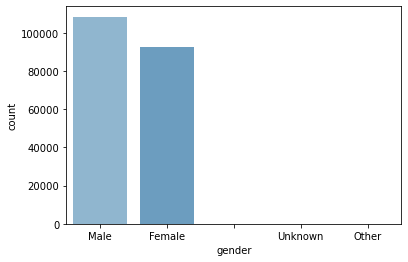

In [16]:
sns.set(style="darkgrid")

sns.barplot(y='count', x='gender', data=gender_distribution, palette="Blues_d", order=gender_distribution.sort_values('count', ascending=False).gender)
plt.show()

In [17]:
sql = 'select ethnicity, count(distinct patientunitstayid) from eicu_crd.patient group by ethnicity;'
ethnicity_distribution = pd.read_sql_query(sql, conn)
ethnicity_distribution

,ethnicity,count
0,,2290
1,African American,21308
2,Asian,3270
3,Caucasian,155285
4,Hispanic,7464
5,Native American,1700
6,Other/Unknown,9542


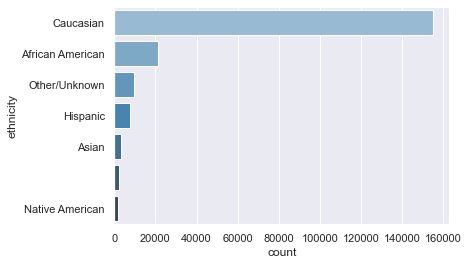

In [18]:
sns.barplot(y='ethnicity', x='count', data=ethnicity_distribution, palette="Blues_d", order=ethnicity_distribution.sort_values('count', ascending=False).ethnicity)
plt.show()

## Other distributions

In [21]:
sql = 'select apacheadmissiondx, count(distinct patientunitstayid) from eicu_crd.patient group by apacheadmissiondx;'
dx_distribution = pd.read_sql_query(sql, conn)
dx_distribution


,apacheadmissiondx,count
0,,22996
1,Abdomen only trauma,174
2,Abdomen/extremity trauma,76
3,Abdomen/face trauma,16
4,Abdomen/multiple trauma,169
...,...,...
388,Vena cava filter insertion,8
389,Ventricular Septal Defect (VSD) Repair,7
390,Ventriculostomy,47
391,Weaning from mechanical ventilation (transfer ...,190


In [22]:
sql = 'select unitadmitsource, count(distinct patientunitstayid) from eicu_crd.patient group by unitadmitsource;'
admitsource_distribution = pd.read_sql_query(sql, conn)
admitsource_distribution

,unitadmitsource,count
0,,1090
1,Acute Care/Floor,5604
2,Chest Pain Center,336
3,Direct Admit,12672
4,Emergency Department,89594
5,Floor,24368
6,ICU,5439
7,ICU to SDU,13827
8,Observation,19
9,Operating Room,24305


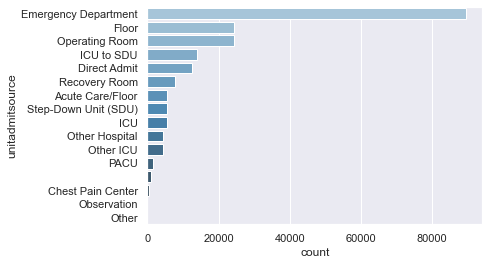

In [23]:
sns.barplot(y='unitadmitsource', x='count', data=admitsource_distribution, palette="Blues_d", order=admitsource_distribution.sort_values('count', ascending=False).unitadmitsource)
plt.show()

In [24]:
sql = 'select unitstaytype, count(distinct patientunitstayid) from eicu_crd.patient group by unitstaytype;'
staytype_distribution = pd.read_sql_query(sql, conn)
staytype_distribution

,unitstaytype,count
0,admit,154948
1,readmit,9947
2,stepdown/other,25239
3,transfer,10725


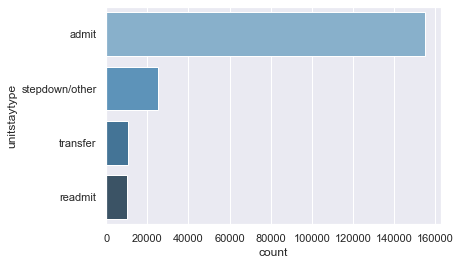

In [26]:
sns.barplot(y='unitstaytype', x='count', data=staytype_distribution, palette="Blues_d", order=staytype_distribution.sort_values('count', ascending=False).unitstaytype)
plt.show()

In [27]:
sql = 'select unitdischargelocation, count(distinct patientunitstayid) from eicu_crd.patient group by unitdischargelocation;'
disch_loc_distribution = pd.read_sql_query(sql, conn)
disch_loc_distribution
	

,unitdischargelocation,count
0,,334
1,Acute Care/Floor,20279
2,Death,10907
3,Floor,93121
4,Home,18880
5,ICU,1274
6,Nursing Home,301
7,Operating Room,13
8,Other,1548
9,Other External,2789


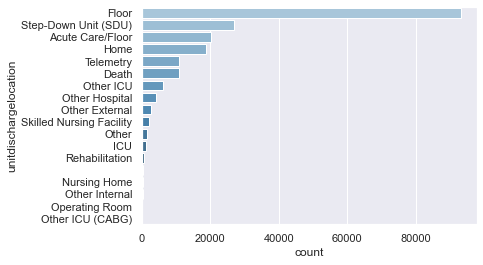

In [28]:
sns.barplot(y='unitdischargelocation', x='count', data=disch_loc_distribution, palette="Blues_d", order=disch_loc_distribution.sort_values('count', ascending=False).unitdischargelocation)
plt.show()

In [29]:
sql = 'select unitdischargestatus, count(distinct patientunitstayid) from eicu_crd.patient group by unitdischargestatus;'
disch_status_distribution = pd.read_sql_query(sql, conn)
disch_status_distribution

,unitdischargestatus,count
0,,34
1,Alive,189918
2,Expired,10907


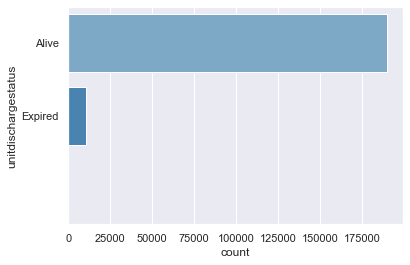

In [30]:
sns.barplot(y='unitdischargestatus', x='count', data=disch_status_distribution, palette="Blues_d", order=disch_status_distribution.sort_values('count', ascending=False).unitdischargestatus)
plt.show()

In [31]:
# close connection
conn.close()